## Innovation Diffusion Analysis: Honor Magic V3
## Shushan Meyroyan
## September 30, 2025

* 1. Introduction <br>
Every year, Time magazine publishes a list of the top 100 innovations. This report focuses
on one of the selected innovations - the Honor Magic V3, a foldable smartphone that
combines portability with a larger screen and advanced AI features. The purpose of this
analysis is to understand its diffusion process using the Bass diffusion model, comparing
it to historical innovations, and estimating future adoption trends.

* 2. Question 1: Selection of Similar Innovation
A similar innovation from the past that resembles the Honor Magic V3 is the launch of
earlier foldable smartphones such as the Samsung Galaxy Z Fold 5, Huawei Mate X5,
Google Pixel Fold, OPPO Find N3, Xiaomi Mix Fold 3, and previous Honor models like
the Magic V2 and Magic Vs2. All of these devices reflect the early adoption of foldable
technology, designed to combine the portability of a traditional phone with the larger
screen of a tablet. Functionally, they allow users to expand the screen for multitasking
and media consumption, while the Magic V3 improves on the concept with a slimmer,
lighter design and advanced AI capabilities.Technologically, the Magic V3 introduces a long-lasting silicon-carbon battery and
a four-lens high-definition camera system, addressing hardware limitations observed in
earlier models. In terms of market impact, foldable smartphones remain a small but growing segment. According to Statista, the global foldable market experienced varying
year-on-year growth across regions from Q1 2022 to Q1 2023, with China showing the
highest increase. The Magic V3, therefore, represents the next step in the iterative devel-
opment of foldables, enhancing usability, portability, and performance while contributing
to gradual market expansion, much like the early foldable devices did.


* 3. Question 2: Justification of Similar Innovation
The earlier foldable smartphones serve as a valid reference point because they represent
the first wave of foldable technology adoption. The Honor Magic V3 builds directly on
this foundation by improving portability through a slimmer and lighter form factor, while
also introducing technological advances such as a silicon-carbon battery and a four-lens
high-resolution camera system. These enhancements address issues like battery longevity
and device bulkiness that earlier models struggled with, while still appealing to a niche
but growing consumer segment.<br>
\newpage

In [1]:
## Libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## Importing Data 

In [2]:

yoy_by_country = pd.read_excel('data/YoY growth rate of the global foldable market from 1st quarter 2022 to 1st quarter 2023, by region  .xlsx')

units_by_year = pd.read_excel('data/Unit shipments of foldable smartphones worldwide from 2022 to 2025 (in millions)  .xlsx')

yoy_by_country.columns = yoy_by_country.columns.str.strip()
units_by_year.columns = units_by_year.columns.str.strip()


In [3]:
units_by_year

,Year,Unit shipments
0,2022,12.72
1,2023,15.90
2,2024,17.80
3,2025,19.80


In [4]:
yoy_by_country

,Country,YoY growth rate
0,China,1.17
1,North America,0.43
2,Western Europe,0.17
3,Asia Pacific,0.15


## Bass Model

In [5]:
years_actual = units_by_year["Year"].values
unit_shipments = units_by_year["Unit shipments"].values
t = years_actual - years_actual[0]

In [6]:
def bass_sales(t, p, q, M):
    F = (1 - np.exp(-(p + q) * t)) / (1 + (q/p) * np.exp(-(p + q) * t))
    return M * (p + q*F) * (1 - F)

In [7]:
p0 = [0.03, 0.38, 200]

In [8]:
params, _ = curve_fit(bass_sales, t, unit_shipments, p0, maxfev=10000)
p, q, M = params

# print(f"Estimated Bass model parameters:\n p = {p:.4f}, q = {q:.4f}, M = {M:.2f}")

4. Using historical adoption data, the estimated Bass model parameters for foldable smart-
phones are:
* p = 0.0703,
* q = 0.2861
* M = 182.72
where p represents the coefficient of innovation, q the coefficient of imitation, and M the
market potential (in millions of units).

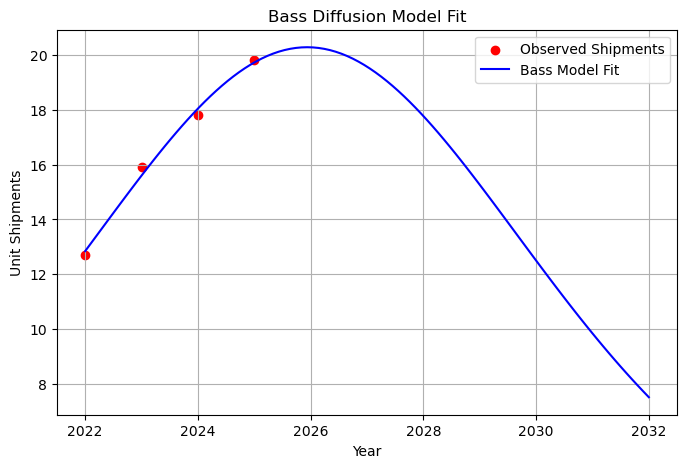

In [9]:
t_fit = np.linspace(0, 10, 100)  
sales_fit = bass_sales(t_fit, p, q, M)
years_fit = years_actual[0] + t_fit  


plt.figure(figsize=(8,5))
plt.scatter(years_actual, unit_shipments, color='red', label='Observed Shipments')
plt.plot(years_fit, sales_fit, color='blue', label='Bass Model Fit')
plt.xlabel("Year")
plt.ylabel("Unit Shipments")
plt.title("Bass Diffusion Model Fit")
plt.legend()
plt.grid(True)
plt.savefig('img/bass_diffusion_model.png', dpi=300)
plt.show()

The Bass model predicts the diffusion of the Honor Magic V3 as follows:
* Adoption begins gradually, with innovators driving initial growth.
* As imitation effects increase, adoption accelerates before reaching a peak around
the mid-diffusion stage.
* The adoption rate eventually declines as market saturation approaches.

## YoY by Country

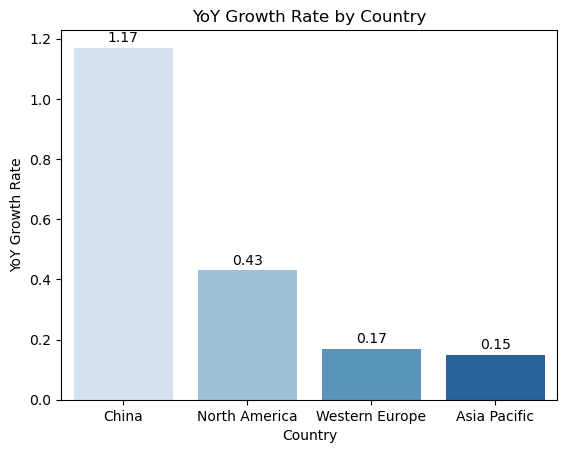

In [10]:
ax = sns.barplot(x='Country', y='YoY growth rate', data=yoy_by_country, palette="Blues")


for p in ax.patches:
    height = p.get_height()
    ax.text(
        x=p.get_x() + p.get_width() / 2,  
        y=height + 0.02,                 
        s=f'{height:.2f}',                
        ha='center'
    )

plt.title('YoY Growth Rate by Country')
plt.xlabel('Country')
plt.ylabel('YoY Growth Rate')
plt.savefig('img/yoy_gorwth_rate_by_country.png', dpi=300)
plt.show()

Year-over-year growth rates by region. China shows the strongest growth at
1.17, followed by North America (0.43), while Western Europe (0.17) and Asia Pacific
(0.15) lag behind.

5. ## Scope of Analysis
Based on the provided YoY growth rates, there are significant differences in adoption
across regions: China (1.17), North America (0.43), Western Europe (0.17), and Asia Pa-
cific (0.15). These disparities suggest that a country-specific scope is more appropriate
for analyzing diffusion, as it captures the true adoption dynamics within each market. <br>
Modeling each region separately allows the Bass diffusion parameters (p, q, M ) to reflect
local market behavior accurately. A global analysis, while useful for high-level summaries,
would mask the high-growth potential of regions such as China and underestimate the
slower adoption in regions like Asia Pacific. This aligns with diffusion of innovation the-
ory, which emphasizes that adoption varies across markets due to differences in culture,
infrastructure, and market maturity (Rogers, 2003; Mahajan et al., 1990).

\newpage
## Number of adopters by period

In [11]:

def bass_model_estimate(p, q, M, periods):
    S = np.zeros(periods)  
    Y = np.zeros(periods)  

    for t in range(periods):
        if t == 0:
            S[t] = min(1, M)  
        else:
            S[t] = (p + q * Y[t-1] / M) * (M - Y[t-1])
        Y[t] = Y[t-1] + S[t]
    return S, Y

# Example for China over 12 periods
S_china, Y_china = bass_model_estimate(p=0.03, q=0.38, M=1000000, periods=12)

print("New adopters per period:", S_china)
print("Cumulative adopters:", Y_china)


New adopters per period: [1.00000000e+00 3.00003500e+04 4.01584417e+04 5.26854165e+04
 6.72612637e+04 8.28038863e+04 9.72162012e+04 1.07486701e+05
 1.10481159e+05 1.04408129e+05 9.01431756e+04 7.11629581e+04]
Cumulative adopters: [1.00000000e+00 3.00013500e+04 7.01597917e+04 1.22845208e+05
 1.90106472e+05 2.72910358e+05 3.70126559e+05 4.77613261e+05
 5.88094420e+05 6.92502549e+05 7.82645725e+05 8.53808683e+05]


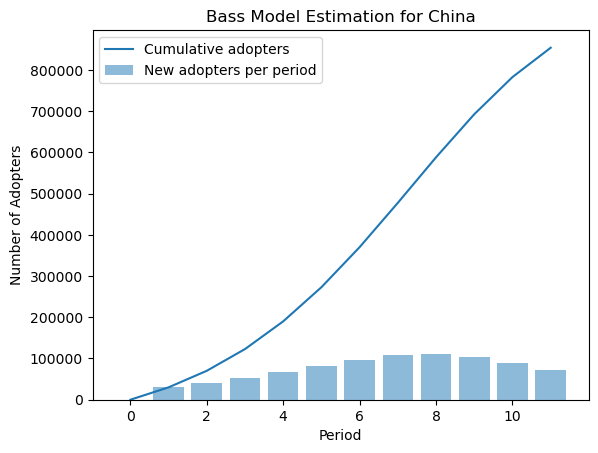

In [12]:
import matplotlib.pyplot as plt

plt.plot(Y_china, label="Cumulative adopters")
plt.bar(range(12), S_china, alpha=0.5, label="New adopters per period")
plt.xlabel("Period")
plt.ylabel("Number of Adopters")
plt.title("Bass Model Estimation for China")
plt.legend()
plt.savefig('img/model_estimation_China.png', dpi=300)
plt.show()


Bass model estimation for China over 12 periods. The line shows cumulative
adopters, while the bars represent new adopters per period. Adoption peaks around
periods 6–8, with cumulative adoption approaching 850,000 units.

\newpage
# Conclusion

The Bass diffusion model provides a structured framework for understanding the adoption trajectory of the Honor Magic V3. The model captures the interplay between innovators and imitators, showing an initial slow uptake followed by rapid growth as social influence and market visibility increase. The analysis highlights significant regional variation, with China exhibiting the fastest adoption due to high market receptivity, while Western Europe and Asia Pacific demonstrate slower uptake, reflecting differences in market maturity and consumer behavior. <br>
By estimating parameters specific to foldable smartphones, the model offers quantitative insights into market potential, peak adoption periods, and expected saturation levels. These insights can guide strategic decisions for production, marketing, and regional launch prioritization. Overall, the Bass model confirms that the Honor Magic V3 is likely to follow a classic diffusion pattern, where early adoption by innovators sets the stage for broader market acceptance, ultimately providing a reliable forecast for future growth and informing investment in targeted regional strategies.

References

* Lindzon, J. (2024). “Honor Magic V3: the Slimmest Foldable Phone,” Time.
* Statista. (n.d.). Foldable smartphone study. Retrieved from Statista: study/168426/foldable-
smartphones